In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
train = pd.read_csv('AirPassengers.csv')

In [3]:
train

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
train.timestamp = pd.to_datetime(train.Month , format = '%Y-%m')
train.index = train.timestamp
train.drop('Month',axis=1,inplace=True)

C:\ProgramData\Anaconda3\envs\Recommandation\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [5]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<AxesSubplot:xlabel='Month'>

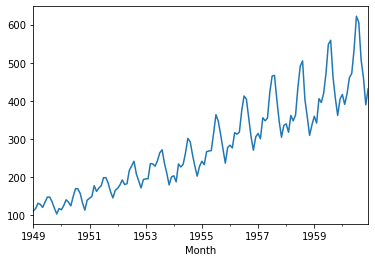

In [6]:
#It is very clear that we have a trend (varying mean) 
#It is better to confirm the observations using some statistical tests.

train['#Passengers'].plot()

In [7]:
#If the test statistic is less than the critical value, 
#we reject the null hypothesis (aka the series is stationary). 

#When the test statistic is greater than the critical value, 
#we fail to reject the null hypothesis (which means the series is not stationary).

#We found test statistic > critical value, test statistic > critical value

from statsmodels.tsa.stattools import adfuller

def adf_test(ts):
    print('Results of ADF Test:')
    dftest = adfuller(ts,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
adf_test(train['#Passengers'])

Results of ADF Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
